Welcome to the BDdb tutorial!  This interactive guide will help you understand how to use the `BDdb.py` library and the `BDNYC.db` database in your own project.  First, let's import the modules we'll need:

In [24]:
import BDdb
import os
import matplotlib.pyplot as plt

Next, pass in the location of the BDdb file to this notebook and store it as a variable: `BDDB_FILE=/some/path ipython notebook`

In [25]:
bddb_path = os.environ['BDDB_FILE']
db = BDdb.get_db(bddb_path)

Next we need to pull the data that we need out of the datatbase. As an example, we want to plot spectral type versus J-Ks color. To do this we'll need spectral types form the spectral types table, and J and Ks magnitudes from the photometry table.

In [26]:
data = db.query.execute("""
SELECT s.spectral_type, p1.magnitude - p2.magnitude
FROM spectral_types AS s
JOIN photometry AS p1
  ON s.source_id = p1.source_id
JOIN photometry AS p2
  ON s.source_id = p2.source_id
WHERE p1.band   = 'J'
  AND p1.system = 2
  AND p2.band   = 'Ks'
  AND p2.system = 2
  AND s.spectral_type BETWEEN 6 AND 32
""").fetchall()

Now let's plot it, label our axes and change the x-axis ticks to alphanumeric spectral types.

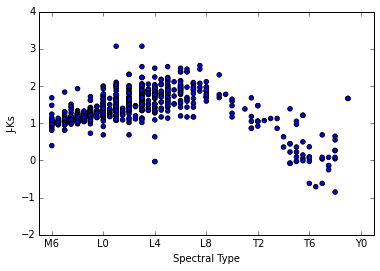

In [27]:
fig, ax = plt.subplots(1)
ax.scatter(*zip(*data))
ax.set_ylabel('J-Ks')
ax.set_xlabel('Spectral Type')
ax.set_xlim(5,31)
ax.set_xticks(range(6,34,4))
labels = ax.set_xticklabels(['M6','L0','L4','L8','T2','T6','Y0'])

That's it!